In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv('data.csv', encoding='ISO-8859-1')

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']


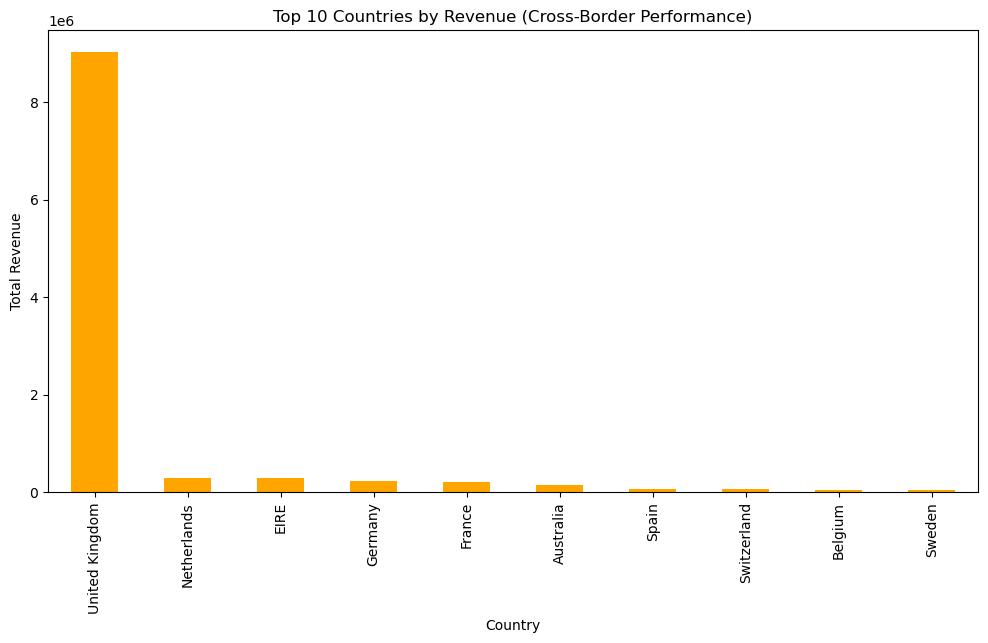

In [10]:

country_sales = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
country_sales.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Revenue (Cross-Border Performance)')
plt.ylabel('Total Revenue')
plt.show()

In [11]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [12]:
import sqlite3

# SQL cONNECTİON
conn = sqlite3.connect('shoope_sales.db')
df.to_sql('sales', conn, if_exists='replace', index=False)

# sql 
query = "SELECT Country, SUM(TotalRevenue) as Total FROM sales GROUP BY Country ORDER BY Total DESC LIMIT 5"
sql_result = pd.read_sql(query, conn)
print(sql_result)

          Country        Total
0  United Kingdom  9025222.084
1     Netherlands   285446.340
2            EIRE   283453.960
3         Germany   228867.140
4          France   209715.110


C:\Users\hüseyin\AppData\Local\Temp\ipykernel_5196\3426734235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  country_plot = sns.barplot(x=sql_result['Country'], y=sql_result['Total'], palette='Oranges_r')


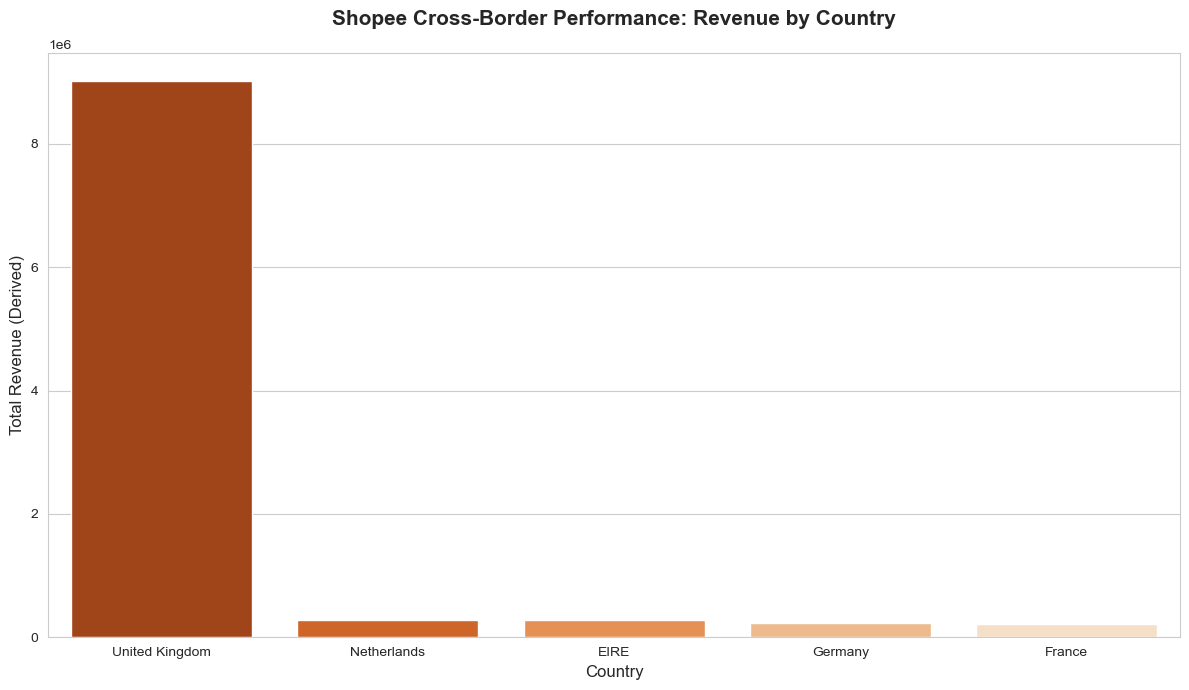

In [19]:
if not os.path.exists('plots'):
    os.makedirs('plots')

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

country_plot = sns.barplot(x=sql_result['Country'], y=sql_result['Total'], palette='Oranges_r')

# graifk başlıkları etiketler
plt.title('Shopee Cross-Border Performance: Revenue by Country', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue (Derived)', fontsize=12)
plt.tight_layout()
plt.savefig('plots/revenue_analysis.jpg', dpi=300)
plt.show()